In [7]:
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
import statsmodels.graphics.tsaplots as tsap
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_white
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
df_panel = pd.read_csv('wb_data_panel_2ind_7units_1992_2014.csv', header=0)
df_panel.head()

,COUNTRY,YEAR,GCF_GWTH_PCNT,GDP_PCAP_GWTH_PCNT
0,Belgium,1992,1.829137,1.119566
1,Belgium,1993,-2.956525,-1.348000
2,Belgium,1994,3.764435,2.909319
3,Belgium,1995,4.113741,2.170550
4,Belgium,1996,0.415439,1.123669


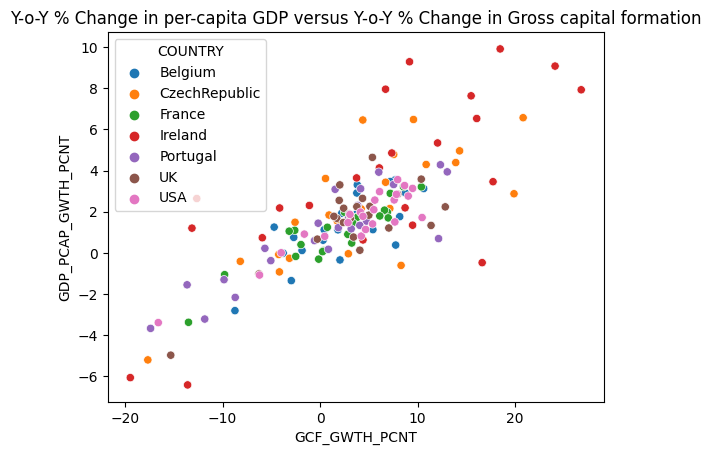

In [9]:
sns.scatterplot(x=df_panel['GCF_GWTH_PCNT'], y=df_panel['GDP_PCAP_GWTH_PCNT'], hue=df_panel['COUNTRY']).set(title="Y-o-Y % Change in per-capita GDP versus Y-o-Y % Change in Gross capital formation")
plt.show()

In [20]:

x_var_name = 'GDP_PCAP_GWTH_PCNT'
y_var_name = 'GCF_GWTH_PCNT'

pooled_y = df_panel[y_var_name]
pooled_x = df_panel[x_var_name]

In [21]:

pooled_x = sm.add_constant(pooled_x)

pooled_olsr_model = sm.OLS(endog=pooled_y, exog=pooled_x)
pooled_olsr_model_results = pooled_olsr_model.fit()

print(pooled_olsr_model_results.summary())

                            OLS Regression Results                            
Dep. Variable:          GCF_GWTH_PCNT   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     261.4
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           2.15e-35
Time:                        10:09:05   Log-Likelihood:                -482.29
No. Observations:                 161   AIC:                             968.6
Df Residuals:                     159   BIC:                             974.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.2197      0

In [22]:
print(pooled_olsr_model_results.resid)

0      0.314733
1      1.555080
2     -2.120701
3      0.032741
4     -1.108986
         ...   
156    7.485617
157    3.446325
158    5.214170
159    3.104131
160    1.275362
Length: 161, dtype: float64


In [23]:
print('Mean value of residual errors='+str(pooled_olsr_model_results.resid.mean()))

Mean value of residual errors=1.765323567105839e-15


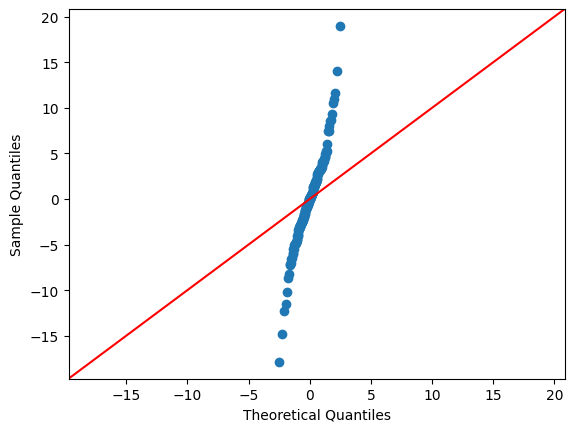

In [24]:
sm.qqplot(data=pooled_olsr_model_results.resid, line='45')
plt.show()